#ARCH 모델을 활용한 테슬라(TSLA) 주가 변동성 예측

In [2]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001568. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


📌 Training MSE (Conditional Volatility vs Squared Return): 0.001443


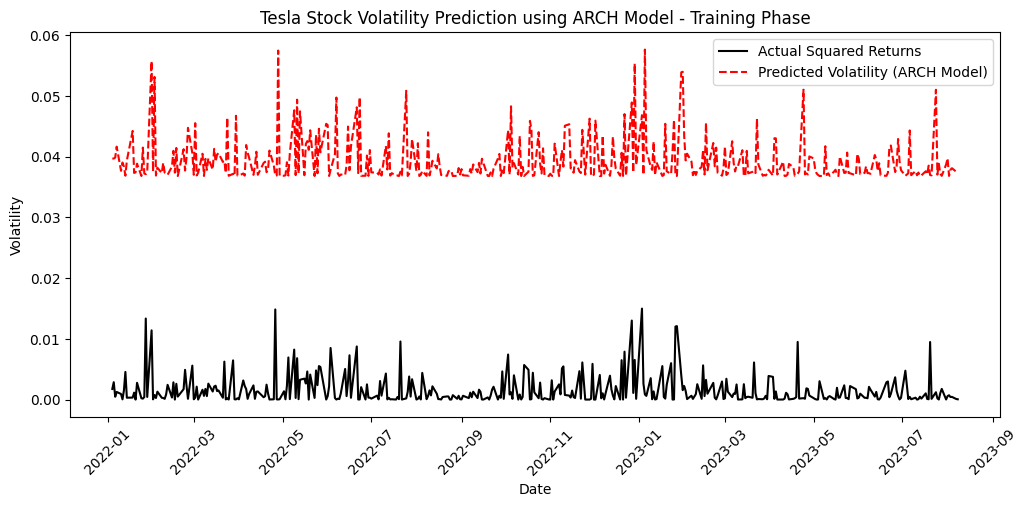

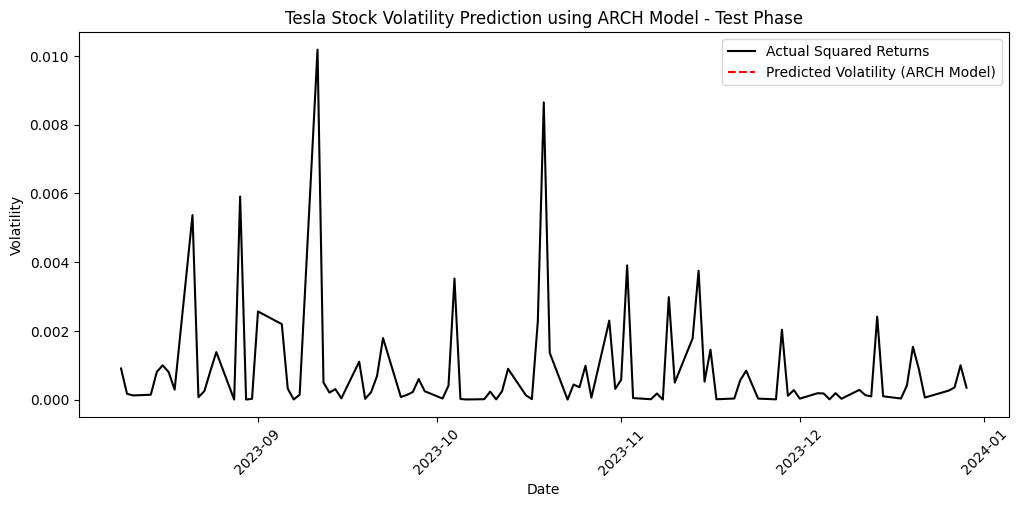

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error

# ✅ 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# ✅ 2️⃣ 데이터프레임 변환 및 수익률 계산
df = df.reset_index()
df["Return"] = df["Close"].pct_change().dropna()  # 종가의 로그 수익률 변환
df = df.dropna()  # 결측값 제거

# ✅ 3️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()

# ✅ 4️⃣ ARCH 모델 설정 및 학습
p = 2  # ARCH(p) 모델의 p값 설정
model = arch_model(train["Return"], vol="ARCH", p=p, dist="normal")  # ARCH 모델 생성
model_fit = model.fit(disp="off")  # 모델 학습

# ✅ 5️⃣ 변동성 예측 수행
train_vol_pred = model_fit.conditional_volatility  # 학습 데이터 변동성 예측
test_vol_pred = model_fit.forecast(start=len(train), reindex=True).variance[-1:].values

# ✅ 6️⃣ 성능 평가 (MSE)
train_mse = mean_squared_error(train["Return"] ** 2, train_vol_pred)
print(f"📌 Training MSE (Conditional Volatility vs Squared Return): {train_mse:.6f}")

# ✅ 7️⃣ 변동성 시각화
plt.figure(figsize=(12, 5))
plt.plot(train["Date"], train["Return"] ** 2, label="Actual Squared Returns", color="black")
plt.plot(train["Date"], train_vol_pred, label="Predicted Volatility (ARCH Model)", linestyle="--", color="red")
plt.title("Tesla Stock Volatility Prediction using ARCH Model - Training Phase")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ✅ 8️⃣ 테스트 데이터 변동성 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test["Return"] ** 2, label="Actual Squared Returns", color="black")
plt.axhline(y=test_vol_pred, label="Predicted Volatility (ARCH Model)", linestyle="--", color="red")
plt.title("Tesla Stock Volatility Prediction using ARCH Model - Test Phase")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ARCH 모델을 활용한 테슬라 변동성 예측 예제

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 68292279.69432437
Iteration:      2,   Func. Count:     15,   Neg. LLF: -583.5194485664761
Iteration:      3,   Func. Count:     22,   Neg. LLF: -927.3311572946341
Iteration:      4,   Func. Count:     26,   Neg. LLF: -921.659500571839
Iteration:      5,   Func. Count:     31,   Neg. LLF: -927.3619699536393
Iteration:      6,   Func. Count:     35,   Neg. LLF: -927.3619843977763
Iteration:      7,   Func. Count:     38,   Neg. LLF: -927.3619839374118
Optimization terminated successfully    (Exit mode 0)
            Current function value: -927.3619843977763
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 7
📌 예측된 변동성 (5일 후): [0.03786723 0.03786723 0.03786723 0.03786723 0.03786723]


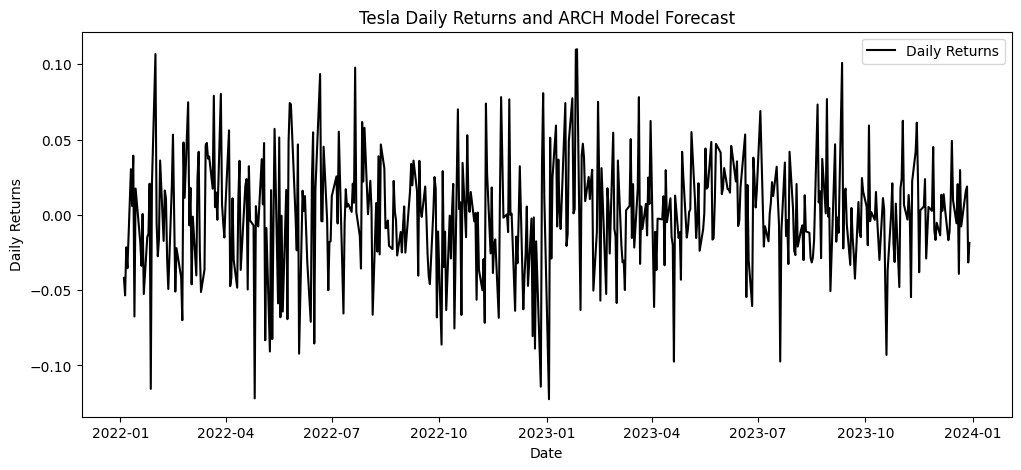

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()
df["Returns"] = df["Close"].pct_change().dropna()  # 수익률 계산

# 📌 2️⃣ ARCH 모델 학습 (p=1 설정)
model = arch_model(df["Returns"].dropna(), vol="ARCH", p=1, rescale=False)
model_fit = model.fit()

# 📌 3️⃣ 변동성 예측
forecast = model_fit.forecast(horizon=5)  # 5일 후 변동성 예측
predicted_volatility = np.sqrt(forecast.variance.iloc[-1])  # 예측된 변동성

print(f"📌 예측된 변동성 (5일 후): {predicted_volatility.values}")

# 📌 4️⃣ 결과 시각화
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Returns"], label="Daily Returns", color="black")
plt.title("Tesla Daily Returns and ARCH Model Forecast")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.show()
